In [7]:
import nltk
from nltk.corpus import stopwords

In [2]:
a = "Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 20-metre (22-yard) pitch with a wicket at each end, each comprising two bails balanced on three stumps. The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are \"out\"). Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side catching the ball after it is hit by the bat, but before it hits the ground. When ten players have been dismissed, the innings ends and the teams swap roles. The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches. They communicate with two off-field scorers who record the match's statistical information.There are various formats ranging from Twenty20, played over a few hours with each team batting for a single innings of 20 overs, to Test matches, played over five days with unlimited overs and the teams each batting for two innings of unlimited length. Traditionally cricketers play in all-white kit, but in limited overs cricket they wear club or team colours. In addition to the basic kit, some players wear protective gear to prevent injury caused by the ball, which is a hard, solid spheroid made of compressed leather with a slightly raised sewn seam enclosing a cork core which is layered with tightly wound string.Historically, cricket's origins are uncertain and the earliest definite reference is in south-east England in the middle of the 16th century. It spread globally with the expansion of the British Empire, leading to the first international matches in the second half of the 19th century. The game's governing body is the International Cricket Council (ICC), which has over 100 members, twelve of which are full members who play Test matches. The game's rules are held in a code called the Laws of Cricket which is owned and maintained by Marylebone Cricket Club (MCC) in London. The sport is followed primarily in the Indian subcontinent, Australasia, the United Kingdom, southern Africa and the West Indies, its globalisation occurring during the expansion of the British Empire and remaining popular into the 21st century.[1] Women's cricket, which is organised and played separately, has also achieved international standard. The most successful side playing international cricket is Australia, which has won seven One Day International trophies, including five World Cups, more than any other country and has been the top-rated Test side more than any other country."

In [3]:
import re

In [4]:
ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()

In [5]:
sentences = nltk.sent_tokenize(a)

In [6]:
sentences

['Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 20-metre (22-yard) pitch with a wicket at each end, each comprising two bails balanced on three stumps.',
 'The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are "out").',
 'Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side catching the ball after it is hit by the bat, but before it hits the ground.',
 'When ten players have been dismissed, the innings ends and the teams swap roles.',
 'The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches.',
 "They communicate with two off-field scorers who record the match's statistical information.There are various formats ranging from Twenty20, played over a few hours with each team batting

In [12]:
stopWords = stopwords.words("english")
corpus = []
def parseText(txt):
    for i in range(len(sentences)):
        sent = re.sub("[^a-zA-Z]"," ",sentences[i])
        sent = sent.lower()
        sent = sent.split()
        words = [lm.lemmatize(word) for word in sent if word not in stopWords]
        sent = " ".join(words)
        corpus.append(sent)
        

In [13]:
parseText(a)

In [14]:
corpus

['cricket bat ball game played two team eleven player field centre metre yard pitch wicket end comprising two bail balanced three stump',
 'batting side score run striking ball bowled wicket bat bowling fielding side try prevent dismiss player',
 'mean dismissal include bowled ball hit stump dislodges bail fielding side catching ball hit bat hit ground',
 'ten player dismissed inning end team swap role',
 'game adjudicated two umpire aided third umpire match referee international match',
 'communicate two field scorer record match statistical information various format ranging twenty played hour team batting single inning over test match played five day unlimited over team batting two inning unlimited length',
 'traditionally cricketer play white kit limited over cricket wear club team colour',
 'addition basic kit player wear protective gear prevent injury caused ball hard solid spheroid made compressed leather slightly raised sewn seam enclosing cork core layered tightly wound string

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [16]:
vectors = count_vect.fit_transform(corpus)

In [20]:
vectors.shape

(14, 173)

In [21]:
count_vect.get_feature_names()

['achieved',
 'addition',
 'adjudicated',
 'africa',
 'aided',
 'also',
 'australasia',
 'australia',
 'bail',
 'balanced',
 'ball',
 'basic',
 'bat',
 'batting',
 'body',
 'bowled',
 'bowling',
 'british',
 'called',
 'catching',
 'caused',
 'centre',
 'century',
 'club',
 'code',
 'colour',
 'communicate',
 'compressed',
 'comprising',
 'core',
 'cork',
 'council',
 'country',
 'cricket',
 'cricketer',
 'cup',
 'day',
 'definite',
 'dislodges',
 'dismiss',
 'dismissal',
 'dismissed',
 'earliest',
 'east',
 'eleven',
 'empire',
 'enclosing',
 'end',
 'england',
 'expansion',
 'field',
 'fielding',
 'first',
 'five',
 'followed',
 'format',
 'full',
 'game',
 'gear',
 'globalisation',
 'globally',
 'governing',
 'ground',
 'half',
 'hard',
 'held',
 'historically',
 'hit',
 'hour',
 'icc',
 'include',
 'including',
 'indian',
 'indie',
 'information',
 'injury',
 'inning',
 'international',
 'kingdom',
 'kit',
 'law',
 'layered',
 'leading',
 'leather',
 'length',
 'limited',
 'london'

In [24]:
vectors.toarray()[12]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [25]:
!pip install wordcloud

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [51]:
stopwords = set(STOPWORDS) 
para = " ".join(corpus)

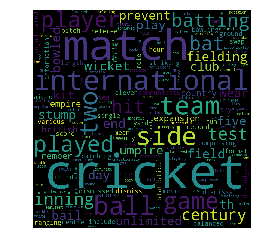

In [56]:
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords).generate(para) 
  
# plot the WordCloud image                        

plt.imshow(wordcloud) 
plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
plt.show() 

'cricket bat ball game played two team eleven player field centre metre yard pitch wicket end comprising two bail balanced three stump batting side score run striking ball bowled wicket bat bowling fielding side try prevent dismiss player mean dismissal include bowled ball hit stump dislodges bail fielding side catching ball hit bat hit ground ten player dismissed inning end team swap role game adjudicated two umpire aided third umpire match referee international match communicate two field scorer record match statistical information various format ranging twenty played hour team batting single inning over test match played five day unlimited over team batting two inning unlimited length traditionally cricketer play white kit limited over cricket wear club team colour addition basic kit player wear protective gear prevent injury caused ball hard solid spheroid made compressed leather slightly raised sewn seam enclosing cork core layered tightly wound string historically cricket origin 